In [197]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns

In [198]:
churn_data=pd.read_csv("Data/ChurnData.csv")

In [199]:
churn_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [200]:
churn_data.shape

(200, 28)

In [201]:
churn_data.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [202]:
churn_data.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [203]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [204]:
churn_data = churn_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_data['churn'] = churn_data['churn'].astype('int')
churn_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [205]:
churn_data.shape

(200, 10)

In [206]:
#churn: müşterinin ayrılma durumu bağımlı değişken
# Bağımsız değişkenler (x_data) ve bağımlı değişken (y_data)

x_data = np.asarray(churn_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x_data[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [207]:
y_data = np.asarray(churn_data['churn'])
y_data[0:5]

array([1, 1, 0, 0, 0])

In [208]:
# Normalize the data
from sklearn import preprocessing
x_data = preprocessing.StandardScaler().fit(x_data).transform(x_data)
x_data[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [209]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [210]:
#model oluşturma
logistic_model=LogisticRegression(C=0.01, solver="liblinear")
#fit etme
logistic_model.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [211]:
#tahmin yapma
y_pred=logistic_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [212]:
# probabilities of predictions
ypred_prob=logistic_model.predict_proba(x_test)
ypred_prob[0:5]
#Neden 1 ve neden 0 veridğinin olasığını hesapladı

array([[0.42242662, 0.57757338],
       [0.72446168, 0.27553832],
       [0.65043571, 0.34956429],
       [0.51114797, 0.48885203],
       [0.50365184, 0.49634816]])

In [213]:
#cm hesaplama
cm=confusion_matrix(y_test, y_pred)

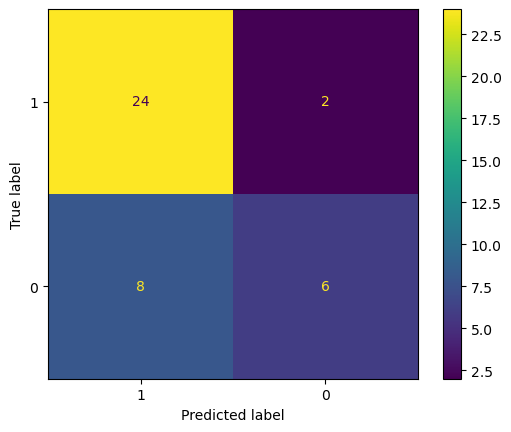

In [214]:
# ConfusionMatrixDisplay'i oluşturma
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])

# Matrisi çizdirin
cm_display.plot()
plt.show()

In [215]:
f1_score=f1_score(y_test, y_pred)
f1_score

0.5454545454545454

In [216]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# TP, TN, FP, FN değerlerini alma
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

# Accuracy hesapla
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

0.75


In [217]:
# Kesinlik 
precision = precision_score(y_test, y_pred)

# Duyarlılık 
recall = recall_score(y_test, y_pred)

# Accuracy
accuracy_score=accuracy_score(y_test, y_pred)

print("Doğruluk (Accuracy): ", accuracy_score)
print("Kesinlik (Precision):", precision)
print("Duyarlılık (Recall):", recall)

Doğruluk (Accuracy):  0.75
Kesinlik (Precision): 0.75
Duyarlılık (Recall): 0.42857142857142855


In [218]:
# Classification report'u hesaplama
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.75      0.43      0.55        14

    accuracy                           0.75        40
   macro avg       0.75      0.68      0.69        40
weighted avg       0.75      0.75      0.73        40



In [219]:
from sklearn.metrics import jaccard_score, log_loss
print("jaccard_score: ",jaccard_score(y_test, y_pred, pos_label=0))

print("log_loss: ", log_loss(y_test, ypred_prob))#log loss ihtimal hesabına bakıyor.
#log loss da daha düşük değer iyidir :) 


jaccard_score:  0.7058823529411765
log_loss:  0.5817876037226268


#Farklı bir model solver="sag" için:

In [220]:
#model oluşturma
logistic_model2=LogisticRegression(C=0.01, solver="sag")
#fit etme
logistic_model2.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='sag')

In [221]:
#tahmin yapma
y_pred_=logistic_model2.predict(x_test)
y_pred_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [222]:
# Classification report'u hesaplama
class_report = classification_report(y_test, y_pred_)
print("Classification Report:\n", class_report)

#F1 score ve accuray arttı

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        26
           1       0.00      0.00      0.00        14

    accuracy                           0.65        40
   macro avg       0.33      0.50      0.39        40
weighted avg       0.42      0.65      0.51        40



d:\Program\Miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program\Miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program\Miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
ypred_prob_=logistic_model.predict_proba(x_test)
ypred_prob_[0:5]

print("jaccard_score: ",jaccard_score(y_test, y_pred_, pos_label=0))

print("log_loss: ", log_loss(y_test, ypred_prob))#log loss ihtimal hesabına bakıyor.
#log loss da daha düşük değer iyidir :) 

jaccard_score:  0.65
log_loss:  0.5817876037226268
